<a href="https://colab.research.google.com/github/hmorgancooper/Lending-Club-Loan-Repayment-Predictions/blob/main/LendingClub_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club: Predictions on loan repayment
Using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club. 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or nor a borrower will pay back their loan? 

The "loan_status" column contains our target.

Importing libraries

In [406]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Downloading file and checking general information on dataset

In [407]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_info.csv to lending_club_info (1).csv
Saving lending_club_loan_two.csv to lending_club_loan_two (1).csv


In [408]:
import io
df = pd.read_csv(io.BytesIO(uploaded['lending_club_loan_two.csv']))
df_info = pd.read_csv(io.BytesIO(uploaded['lending_club_info.csv']))

Displaying label descriptions

In [409]:
df_info

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


Function to return the description of the feature in full

In [410]:
def feat_info(feature):
  return print(df_info[df_info['LoanStatNew']==feature]['Description'])

#makes sure description is not truncated.
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [411]:
feat_info('initial_list_status')

24    The initial listing status of the loan. Possible values are – W, F
Name: Description, dtype: object


Now checking the main dataframe

In [412]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Mixture of numerical and non-numerical features, some null values.
Checking heatmap of data to get a sense of how many null values we have and where they are located.

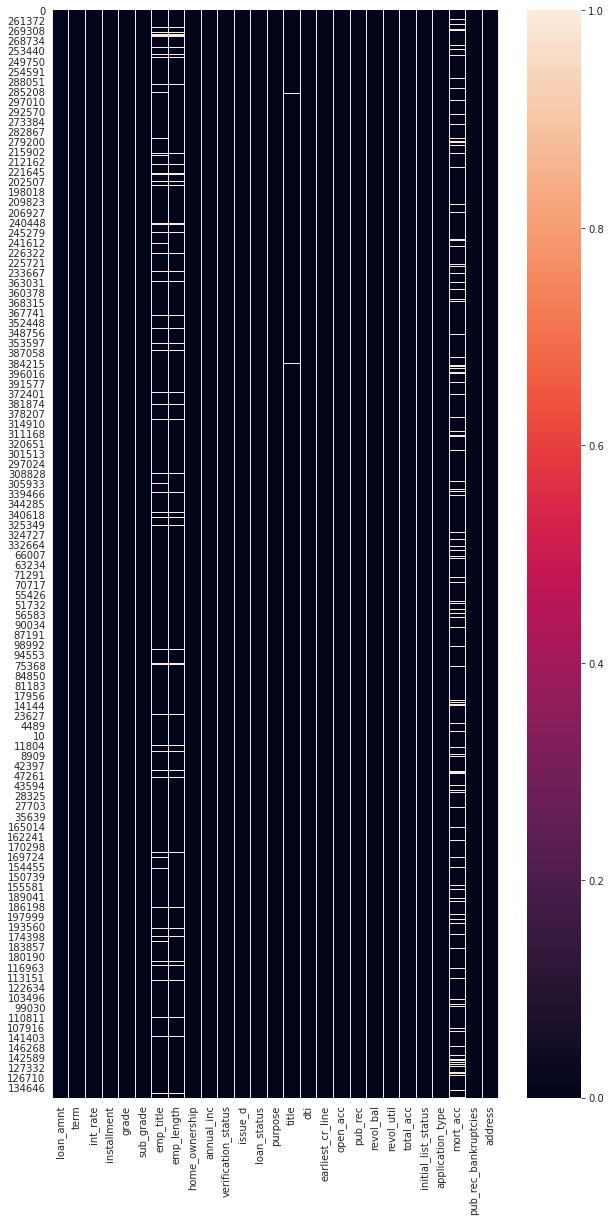

In [414]:
plt.figure(figsize = (10, 20))
sns.heatmap(df.isnull().sort_values('loan_amnt'))

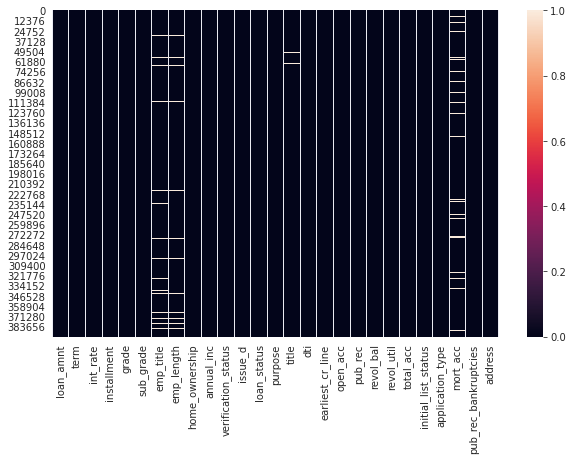

In [415]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [416]:
df.isnull().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
emp_title               22927
emp_length              18301
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
dtype: int64

6 features contain null values. These will need to be filled in/deleted before analysis takes place but lets do some initial data exploration first.

# **Data Visualisation**

Checking how balanced the dataset is.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


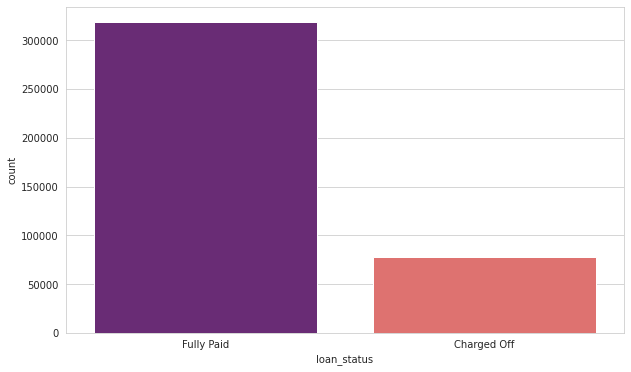

In [417]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.countplot(df['loan_status'], palette = 'magma')

Dataset is not balanced - significantly more 'fully paid' cases than 'charged off'.

Next checking distribution of loan amounts.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


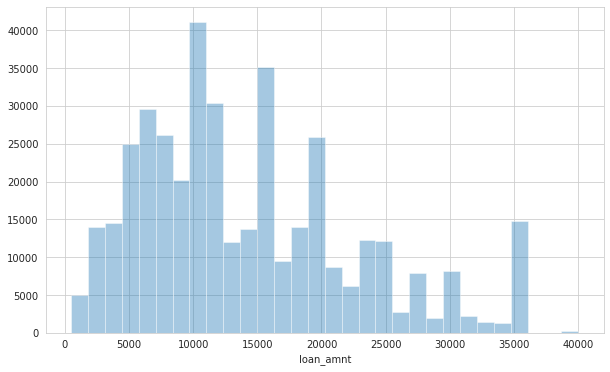

In [418]:
plt.figure(figsize = (10,6))
sns.distplot(df['loan_amnt'], kde = False, bins = 30)

Data has a slight skew, with most loans between 5000 - 25000. No extreme outliers.





## Numerical Features

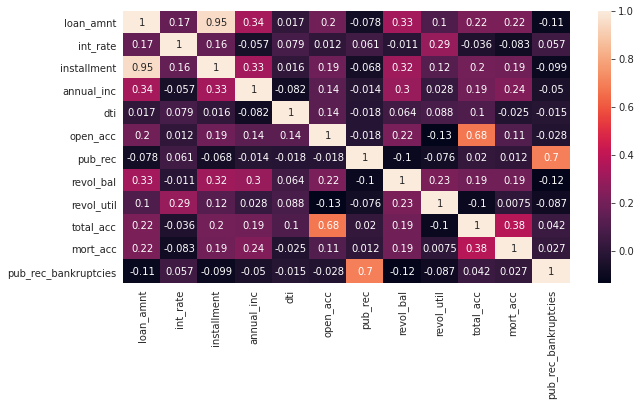

In [419]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)

Most features have little correlation with one another. However loan_amnt and installment have 95% correlation and so may contain duplicate information. Installment is the monthly payment owed by the borrower and so is likely to correlate highly with loan amount but let's check the scatter plot to make sure both features contain useful information for the model. 

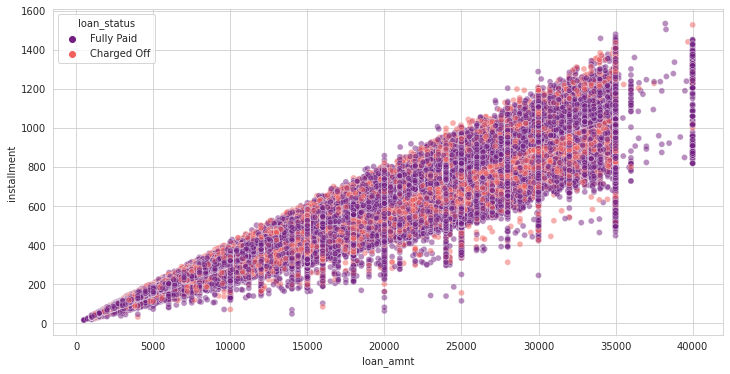

In [420]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x = 'loan_amnt', y = 'installment', hue = 'loan_status', alpha = 0.5, palette = 'magma')

Although the data is highly correlated there is still a decent spread so both features will be left in - there could be some correlation between 'charged off' loans and the monthly repayments.

Next looking at boxplot of loan amount and loan status.

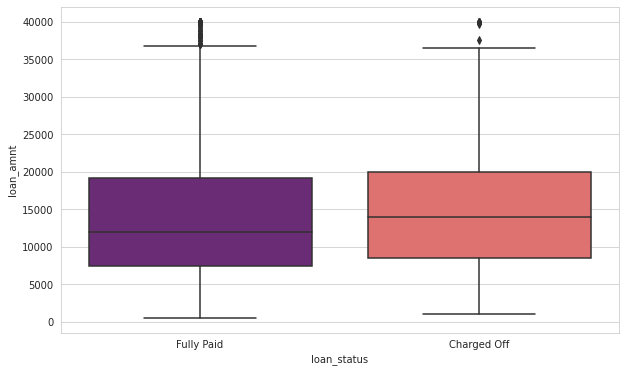

In [421]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'loan_status', y = 'loan_amnt', palette = 'magma')

The mean for charged off loans is higher than for fully paid, the spread of the data is similar (similar inner quartile ranges).

Checking the distribution of fully paid and charged off loans for the numerical features.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


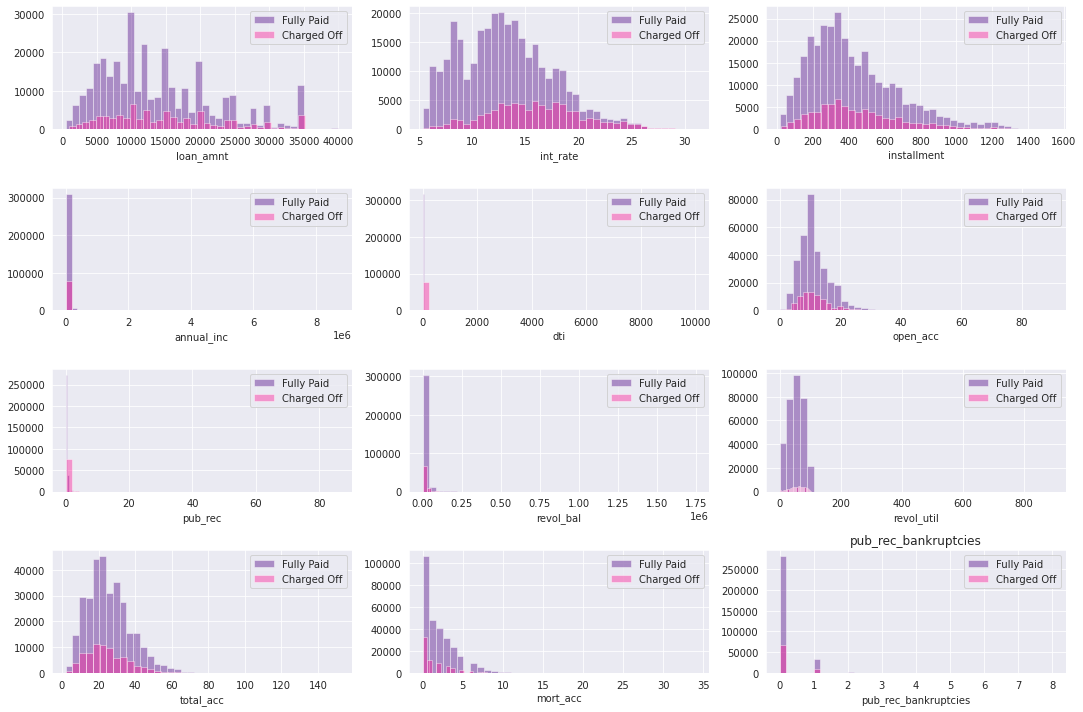

In [422]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (15, 10), nrows = 4, ncols = 3)
for i, col in enumerate(df.corr().columns):
  plot = sns.distplot(df[df['loan_status']=='Fully Paid'][col], kde = False, label = 'Fully Paid', color = 'indigo', bins = 40, ax = axes[i//3, i%3])
  plot = sns.distplot(df[df['loan_status']=='Charged Off'][col], kde = False, label = 'Charged Off', color = 'deeppink', bins = 40, ax = axes[i//3, i%3] )
  plot = plt.title(col)
  axes[i//3, i%3].legend()

plt.tight_layout()

Some of the distributions look like they contain outliers which may not be helpful for the model. These will be evaluated later with the missing values. 

For most of the above features the distribution of fully paid and charged off loans look similar, however for int_rate (interest rate) the distribution for charged off loans sits at higher values. This may or may not be causal - higher interest rates are harder to repay and so people may default for that reason (causal) or people who are more likely to default on their loans anyway are given higher interest rates (non-causal). We can investigate this further by looking at the grade of the loans. 

In [423]:
df_grade = df.groupby('grade').mean()

In [424]:
df_grade

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
grade,,,,,,,,,,,,
A,13294.734526,7.392854,408.123876,84703.468789,14.723993,11.417966,0.076900,16940.274308,38.632460,26.703398,2.256606,0.051349
B,12895.710795,11.223131,401.774645,73522.710447,16.652547,11.143383,0.172439,15668.464919,52.526639,25.292834,1.842428,0.123557
C,13761.337004,14.317992,419.454203,71224.899003,18.031366,11.258626,0.211800,15514.383566,57.270193,25.054441,1.723005,0.144424
D,14695.402919,17.484528,451.851504,69681.434023,18.780786,11.310103,0.213730,15152.616712,60.086245,24.747733,1.600051,0.140873
E,17723.595497,20.283007,519.917415,73550.810013,19.484808,11.644087,0.205126,16489.035664,61.085062,25.624555,1.688450,0.135624
F,19211.506116,23.701144,571.571673,75008.023439,19.475439,11.757390,0.207866,16299.778542,62.126723,25.746602,1.672991,0.135652
G,20879.952521,25.904352,640.566146,80401.177554,19.253785,12.131631,0.227898,16954.232155,61.796259,25.897511,1.689506,0.137287


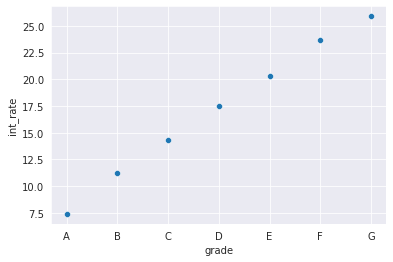

In [425]:
sns.scatterplot(x = df_grade.index, y = df_grade['int_rate'])

There is a clear linear relationship between the average interest rate and the grade of the loan, so the correlation between defaulting on the loan and interest rate is probably not causal.

Lets take a closer look at the grade and subgrade features.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


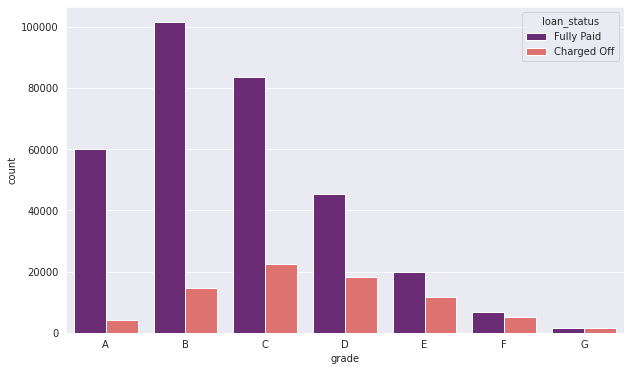

In [426]:
plt.figure(figsize = (10,6))
sns.countplot(df.sort_values('grade')['grade'], hue = df['loan_status'], palette = 'magma')

For grades A - D most loans are paid off, however grades E - G have a high proportion of Charged off loans (especially considering that there is significanly more data for fully paid loans than charged off loans). Let's look at this in more detail with the subgrades.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


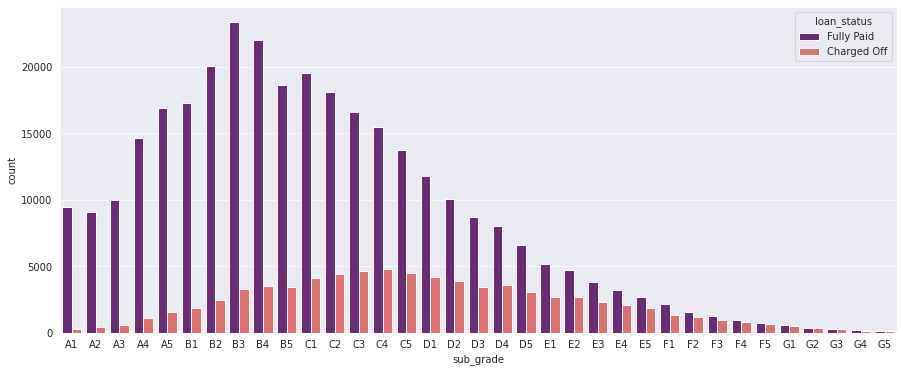

In [427]:
plt.figure(figsize = (15,6))
sns.countplot(df.sort_values('sub_grade')['sub_grade'], hue = df['loan_status'], palette = 'magma')

Loans F1 and higher do not get paid back very often.

Next lets create a column that is 1 is the loan is fully paid and 0 if it is charged off so that we can look at the correlation of the numerical features.

In [428]:
df['Paid'] = df['loan_status'].apply(lambda x:1 if x == 'Fully Paid' else 0)

In [429]:
df[['loan_status', 'Paid']]

,loan_status,Paid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [430]:
df.corr()['Paid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Paid                    1.000000
Name: Paid, dtype: float64

So from this the feature with the biggest correlation is the interest rate (which we have previously determined is very closely related to the grade). Other features have very low correlation.

Lets take a look at some of the categorical features.

## Categorical Features

In [431]:
non_num_cols = df.select_dtypes(exclude = np.number).columns
print(non_num_cols)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


Checking number of unique values to see which features it makes sense to plot and include in the model.

In [432]:
unique = pd.DataFrame(df[non_num_cols].nunique())

In [433]:
unique

,0
term,2
grade,7
sub_grade,35
emp_title,173105
emp_length,11
home_ownership,6
verification_status,3
issue_d,115
loan_status,2
purpose,14


Employee title, title and address have too many different values to plot.

* Employee title contains a lot of different formats which probably refer to the same type of job (eg mis-spelt words, capitalisations and variation in job titles). Even if this data was cleaned and regularised there will be too many values, and so it will not be included in the model.

* For title (loan title provided by borrower), the relevant information is contained in 'purpose' which categorises the loan into options like 'credit card repayment' or 'vacation'. So we can remove the 'title' column from our model calculations.

* Address will not be included in data visualisation for now, but this feature will be explored futher in the data preprocessing section.

* The grade information is included in subgrade so grade will be removed.

Earliest cr line, can be turned into a datetime object if the input is formatted the same.

Now creating countplots of the remaining columns to look at distribution of fully paid and charged off loans within each feature.


In [434]:
df_less_feats = df.drop(['emp_title', 'title', 'grade'], axis = 1)

In [435]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT         425   
DIRECT_PAY    286   
Name: application_type, dtype: int64

Not enough information in 'Joint' or 'Direct Pay' categories for feature to be very useful.

In [436]:
df_less_feats.drop('application_type', axis =1, inplace = True)

Now visualising the remaining categorical features.

In [437]:
cols_to_plot = ['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

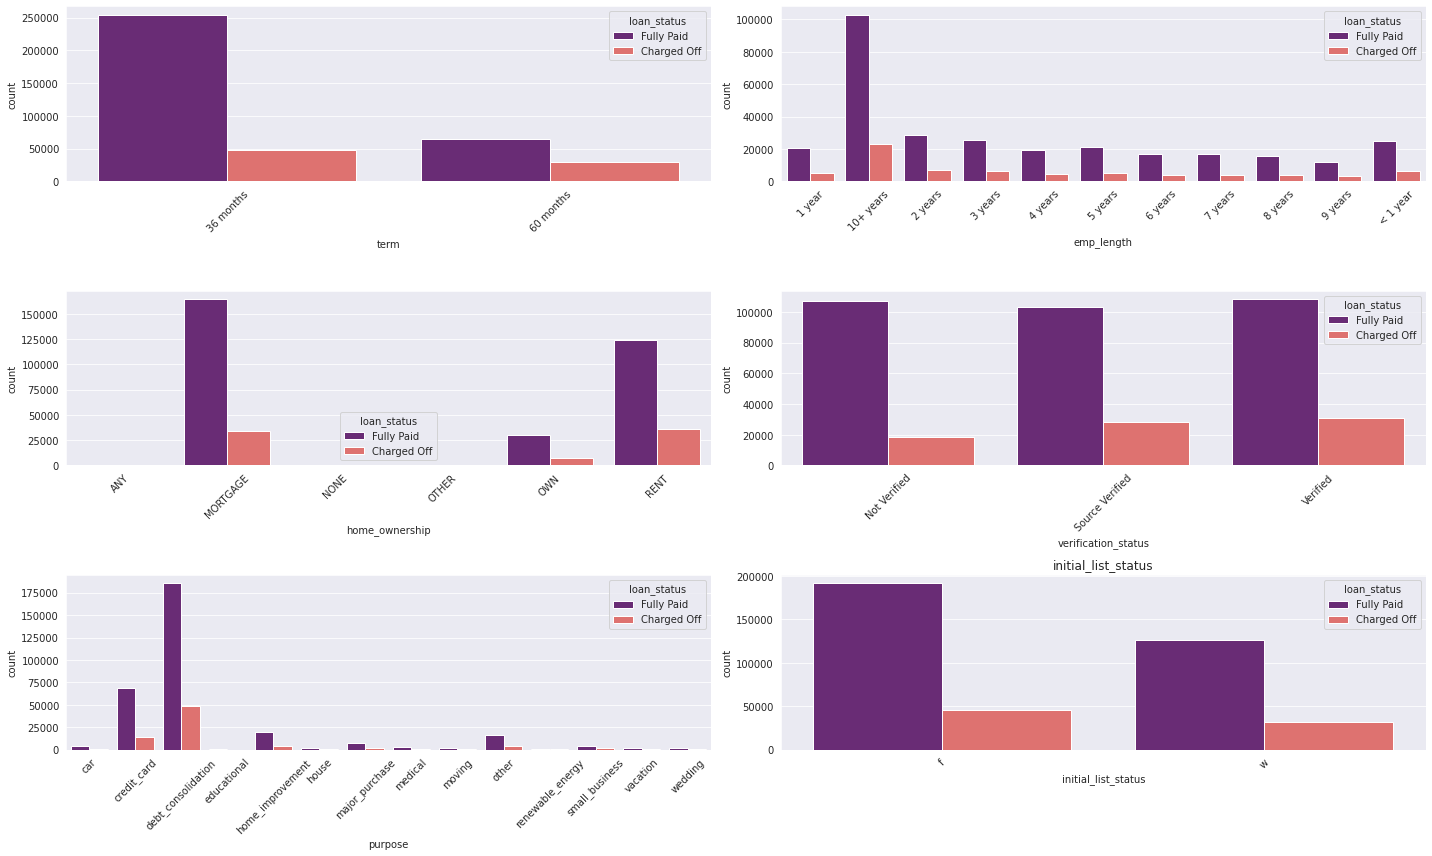

In [438]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (20, 12), nrows = 3, ncols = 2)
for i, col in enumerate(cols_to_plot):
  plot = sns.countplot(df.sort_values(col)[col], hue = df['loan_status'], ax = axes[i//2, i%2], palette = 'magma')
  plot = plt.title(col)
  axes[i//2, i%2].tick_params('x', labelrotation=45)
plt.tight_layout()

Features that stand out here are:
* Term length - a much higher proportion of 60 month terms are not repaid. This may be similar to the case with interest rate where people with a lower chance of repaying their loans are only granted longer terms with lower monthly repayments (or that people with a lower chance are more likely to choose lower monthly repayments). Will check below.
* People getting a loan for deby consolidation are less likely to repay the loan than for other reasons. 
* People that have worked for over 10 years have a much higher likelihood of repaying the loan


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


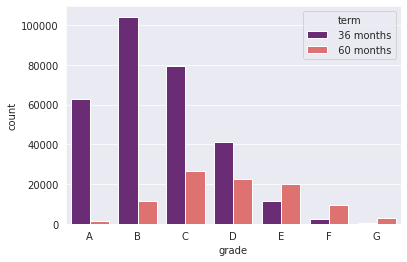

In [439]:
sns.countplot(df.sort_values('grade')['grade'], hue = df['term'], palette = 'magma')

As expected - people who have higher loan grades (poorer credit scores) are more likely to get loans with longer terms.

# **Data Cleaning/ Preprocessing: Missing Data**




Finding number of missing values per column

In [440]:
missing = df.isnull().sum()
missing

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
emp_title               22927
emp_length              18301
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
Paid                    0    
dtype: int64

Finding percentage of dataframe with missing values for each feature.

In [441]:
per_missing = (missing/len(df))*100
per_missing

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
Paid                    0.000000
dtype: float64

So features with missing values are; 

* emp_title (job title), we decided earlier this contained too many unique values so removed it
* emp_length (num years employed), further exploration needed
* title (The loan title provided by the borrower), valuable information contained in 'purpose' feature so we already got rid of it
* mort_acc (num of mortgage accounts), further exploration
* revol_util (amount of credit the borrower is using relative to all available revolving credit), very small % of missing data, can just delete missing observations
* pub_rec_bankruptcies (num of public bankruptcies), very small % of missing data, can delete missing observations


## Emp Length

We need to see if emp_length contains useful information before either deleting or filling in the missing values, or removing the feature. We have already looked at the countplot of the data, but a more useful graph would be one showing the percentage of people in each category that pay off or default on their loans.

In [442]:
val_cnts_tot = df['emp_length'].value_counts()
val_cnts_paid = df[df['loan_status']=='Fully Paid']['emp_length'].value_counts()
val_cnts_default = df[df['loan_status']=='Charged Off']['emp_length'].value_counts()
per_val_cnts_default = pd.DataFrame((val_cnts_default/val_cnts_tot)*100)

In [443]:
per_val_cnts_default

,emp_length
1 year,19.913453
10+ years,18.418610
2 years,19.326206
3 years,19.523133
4 years,19.238477
5 years,19.218721
6 years,18.919438
7 years,19.477400
8 years,19.976002
9 years,20.047016


In [444]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

Text(0.5, 1.0, 'Percentage of Charged Off loans per Emp Length Category')

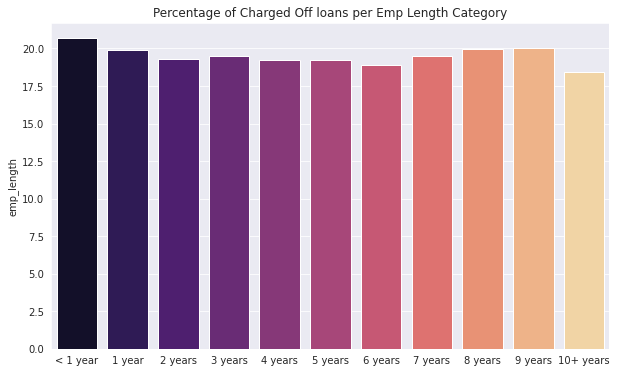

In [445]:
plt.figure(figsize = (10,6))
sns.barplot(x = per_val_cnts_default.index, y = per_val_cnts_default['emp_length'], order = emp_length_order, palette = 'magma')
plt.title("Percentage of Charged Off loans per Emp Length Category")

Charge off rates are very similar, so we can just get rid of this column

In [446]:
df_less_feats.drop('emp_length', axis = 1, inplace= True)

## mort_acc

In [447]:
feat_info('mort_acc')

26    Number of mortgage accounts.
Name: Description, dtype: object


In [448]:
df['mort_acc'].value_counts()

0.0     139777
1.0     60416 
2.0     49948 
3.0     38049 
4.0     27887 
5.0     18194 
6.0     11069 
7.0     6052  
8.0     3121  
9.0     1656  
10.0    865   
11.0    479   
12.0    264   
13.0    146   
14.0    107   
15.0    61    
16.0    37    
17.0    22    
18.0    18    
19.0    15    
20.0    13    
24.0    10    
22.0    7     
21.0    4     
25.0    4     
27.0    3     
23.0    2     
32.0    2     
26.0    2     
31.0    2     
30.0    1     
28.0    1     
34.0    1     
Name: mort_acc, dtype: int64

Checking correlation between mort_acc and other columns to see if we can impute the missing values.

In [449]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
Paid                    0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

The total_acc column is the highest correlated column, we will use the mean value of mort_acc for each total_acc category and fill in the missing values.

In [450]:
mean_mort_acc = df.groupby('total_acc').mean()['mort_acc']
mean_mort_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [451]:
mean_mort_acc[df['total_acc'][0]]


1.9005057623745958

In [452]:
def function(mort_acc, total_acc):
  if np.isnan(mort_acc):
    return mean_mort_acc[total_acc]
  else:
    return mort_acc

In [453]:
df_less_feats['mort_acc_full'] = df.apply(lambda x:function(x['mort_acc'], x['total_acc']), axis = 1)

The remaining features will missing values are revol_util and pub_rec_bankruptcies. However the percetage of missing features is less than 0.5% so we will just drop the null values.

In [454]:
df_less_feats = df_less_feats.dropna()

In [455]:
df_less_feats.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
Paid                    0
mort_acc_full           0
dtype: int64

We can also remove the original mort_acc column as it we have filled in the missing values in mort_acc_full

In [456]:
df_less_feats.drop('mort_acc', axis = 1, inplace = True)

# **Categorical Variables and Dummy Variables**

Next we will look at all the categorical variables, determine whether they will be useful for the model and convert the appropriate ones to dummy variables.

We have already removed emp_title, title, grade, and application_type above.

In [457]:
cat_var = df_less_feats.select_dtypes(exclude = np.number).columns
cat_var

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'address'],
      dtype='object')

## Term
Converting the term feature into a numerical column.

In [458]:
feat_info('term')

1    The number of payments on the loan. Values are in months and can be either 36 or 60.
Name: Description, dtype: object


In [459]:
df_less_feats['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [460]:
df_less_feats['term_num'] = df_less_feats['term'].apply(lambda x:36 if "36" in x else 60)

In [461]:
df_less_feats[['term_num', 'term']]

,term_num,term
0,36,36 months
1,36,36 months
2,36,36 months
3,36,36 months
4,60,60 months
...,...,...
396024,36,36 months
396025,60,60 months
396026,36,36 months
396027,36,36 months


In [462]:
df_less_feats.drop('term', axis = 1, inplace = True)

## Subgrade

Creating dummy variables for the subgrade categories and concatenating these with the df_less_feats

In [463]:
subgrade_dummies = pd.get_dummies(df_less_feats['sub_grade'], drop_first=True)

In [464]:
df_dummies = pd.concat([df_less_feats, subgrade_dummies], axis = 1)

In [465]:
df_dummies.head()

,loan_amnt,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,pub_rec_bankruptcies,address,Paid,mort_acc_full,term_num,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,3.0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0.0,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0.0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [466]:
df_dummies.drop('sub_grade', axis = 1, inplace=True)

## Home ownership

In [467]:
feat_info('home_ownership')

8    The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
Name: Description, dtype: object


In [468]:
df_dummies['home_ownership'].value_counts()

MORTGAGE    181592
RENT        141604
OWN         34752 
OTHER       34    
NONE        29    
ANY         3     
Name: home_ownership, dtype: int64

Not enough info in 'other','none' or 'any' so combining them all under 'other'

In [469]:
df_dummies['home_ownership_less'] = df_dummies['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [470]:
df_dummies['home_ownership_less'].value_counts()

MORTGAGE    181592
RENT        141604
OWN         34752 
OTHER       66    
Name: home_ownership_less, dtype: int64

In [471]:
df_dummies.drop('home_ownership', axis = 1, inplace= True)

In [472]:
home_dummies = pd.get_dummies(df_dummies['home_ownership_less'], drop_first = True)
df_dummies = pd.concat([df_dummies, home_dummies], axis = 1)
df_dummies.drop('home_ownership_less', axis = 1, inplace= True)

## Verification Status, Initial_list_status, Purpose

Creating dummy variables and concatenating these with df_dummies

In [473]:
dummies = pd.get_dummies(df_dummies[['verification_status','initial_list_status','purpose' ]],drop_first=True)
df_dummies = df_dummies.drop(['verification_status','initial_list_status','purpose'],axis=1)
df_dummies = pd.concat([df_dummies,dummies],axis=1)

In [474]:
df_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,address,Paid,mort_acc_full,term_num,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,3.0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0.0,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0.0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Issue_d


In [475]:
feat_info('issue_d')

11    The month which the loan was funded
Name: Description, dtype: object


Prospective loans would not have a month in which the loan was funded so we can just get rid of this column

In [476]:
df_dummies.drop('issue_d', axis = 1, inplace=True)

## Address

Extracing the zipcode from the address column.

In [477]:
df_dummies['address']

0         0174 Michelle Gateway\nMendozaberg, OK 22690         
1         1076 Carney Fort Apt. 347\nLoganmouth, SD 05113      
2         87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113      
3         823 Reid Ford\nDelacruzside, MA 00813                
4         679 Luna Roads\nGreggshire, VA 11650                 
                          ...                                  
396024    514 Cynthia Park Apt. 402\nWest Williamside, SC 05113
396025    12951 Williams Crossing\nJohnnyville, DC 30723       
396026    0114 Fowler Field Suite 028\nRachelborough, LA 05113 
396027    953 Matthew Points Suite 414\nReedfort, NY 70466     
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 29597   
Name: address, Length: 358014, dtype: object

In [478]:
def zipcode(string):
  split = string.split(" ")
  return split[-1]

In [479]:
df_dummies['zip_code'] = df['address'].apply(lambda x:zipcode(x))

In [480]:
df_dummies[['address','zip_code']]

,address,zip_code
0,"0174 Michelle Gateway\nMendozaberg, OK 22690",22690
1,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",05113
2,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",05113
3,"823 Reid Ford\nDelacruzside, MA 00813",00813
4,"679 Luna Roads\nGreggshire, VA 11650",11650
...,...,...
396024,"514 Cynthia Park Apt. 402\nWest Williamside, SC 05113",05113
396025,"12951 Williams Crossing\nJohnnyville, DC 30723",30723
396026,"0114 Fowler Field Suite 028\nRachelborough, LA 05113",05113
396027,"953 Matthew Points Suite 414\nReedfort, NY 70466",70466


In [481]:
df_dummies['zip_code'].nunique()

10

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


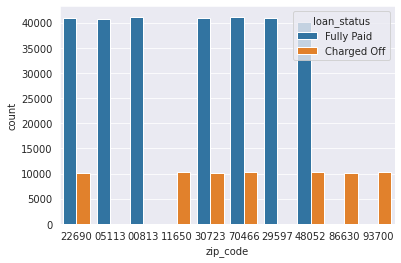

In [482]:
sns.countplot(df_dummies['zip_code'], hue = df_dummies['loan_status'])

In [483]:
df_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,address,Paid,mort_acc_full,term_num,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code
0,10000.0,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,22690
1,8000.0,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,3.0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,05113
2,15600.0,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0.0,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,05113
3,7200.0,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0.0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,00813
4,24375.0,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11650


In [484]:
zip_dummies = pd.get_dummies(df_dummies['zip_code'], drop_first=True)
df_dummies.drop(['address', 'zip_code'], axis = 1, inplace=True)


In [485]:
df_dummies = pd.concat([df_dummies,zip_dummies],axis=1)

In [486]:
df_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,Paid,mort_acc_full,term_num,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,1,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0.0,1,3.0,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,1,0.0,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,1,0.0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0.0,0,1.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Earliest_cr_line
Extract year from column

In [487]:
feat_info('earliest_cr_line')

18    The month the borrower's earliest reported credit line was opened
Name: Description, dtype: object


In [488]:
df_dummies['earliest_cr_line'] = df['earliest_cr_line']

In [489]:
def get_year(string):
  str_split = str(string).split("-")
  return int(str_split[-1])


In [490]:
df_dummies['earliest_cr_year'] = df_dummies['earliest_cr_line'].apply(lambda x: get_year(x))

In [491]:
df_dummies[['earliest_cr_year', 'earliest_cr_line']]

,earliest_cr_year,earliest_cr_line
0,1990,Jun-1990
1,2004,Jul-2004
2,2007,Aug-2007
3,2006,Sep-2006
4,1999,Mar-1999
...,...,...
396024,1991,Nov-1991
396025,2004,Nov-2004
396026,2006,Feb-2006
396027,1997,Mar-1997


In [492]:
df_dummies.drop('earliest_cr_line', axis =1, inplace= True)

## Final checks

In [493]:
df_dummies.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'Paid', 'mort_acc_full', 'term_num', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', '05113', '11650', '22690',
       '29597', '30723', '48052', '70466', '86630', '93700',
   

In [494]:
df_dummies.drop('loan_status', axis = 1, inplace= True)

In [495]:
df_dummies.select_dtypes(exclude = np.number).columns

Index([], dtype='object')

In [496]:
df_dummies.isnull().sum()

loan_amnt           0
int_rate            0
installment         0
annual_inc          0
dti                 0
                   ..
48052               0
70466               0
86630               0
93700               0
earliest_cr_year    0
Length: 77, dtype: int64

# Train Test Split

In [497]:
from sklearn.model_selection import train_test_split

In [600]:
X = df_dummies.drop('Paid', axis = 1)
y = df_dummies['Paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [601]:
X_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,mort_acc_full,term_num,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
92951,6625.0,20.80,248.92,32500.0,33.60,12.0,0.0,4956.0,67.0,14.0,0.0,0.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2005
356102,12000.0,14.33,281.28,74000.0,9.75,5.0,0.0,10603.0,63.9,14.0,0.0,0.0,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1997
227714,7500.0,18.49,273.00,80276.0,13.86,9.0,0.0,16042.0,49.1,27.0,0.0,0.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1986
127701,35000.0,25.78,1043.37,90000.0,20.01,14.0,0.0,30348.0,74.2,39.0,0.0,7.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1997
50744,22000.0,10.64,716.51,65000.0,25.66,7.0,0.0,28832.0,51.5,37.0,0.0,4.0,36,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2000


# Normalising the Data

Using MinMaxScaler to normalise the X_train and X_test (only training on X_train so that we don't get data leakage)

In [602]:
from sklearn.preprocessing import MinMaxScaler

In [603]:
scaler = MinMaxScaler()

In [604]:
X_train = scaler.fit_transform(X_train)

In [605]:
X_train

array([[0.14423077, 0.60303857, 0.1503118 , ..., 0.        , 0.        ,
        0.88405797],
       [0.28205128, 0.35099338, 0.17171123, ..., 0.        , 0.        ,
        0.76811594],
       [0.16666667, 0.51305025, 0.16623572, ..., 0.        , 0.        ,
        0.60869565],
       ...,
       [0.17948718, 0.30346708, 0.16423862, ..., 0.        , 0.        ,
        0.86956522],
       [0.28205128, 0.51305025, 0.27454883, ..., 0.        , 0.        ,
        0.7826087 ],
       [0.19230769, 0.37670432, 0.18053287, ..., 0.        , 0.        ,
        0.8115942 ]])

Scaling has worked, now scaling X_test

In [606]:
X_test = scaler.transform(X_test)

In [607]:
X_test

array([[0.11282051, 0.28710557, 0.105496  , ..., 0.        , 0.        ,
        0.86956522],
       [0.23076923, 0.41137515, 0.21780332, ..., 0.        , 0.        ,
        0.89855072],
       [0.74358974, 0.38917024, 0.67643616, ..., 0.        , 0.        ,
        0.75362319],
       ...,
       [0.12820513, 0.40085703, 0.12443542, ..., 0.        , 0.        ,
        0.73913043],
       [0.35897436, 0.27931437, 0.31749979, ..., 0.        , 0.        ,
        0.69565217],
       [0.38461538, 0.47721075, 0.2519194 , ..., 0.        , 0.        ,
        0.7826087 ]])

# Creating the model

Importing the various libaries

In [608]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm

Creating the neural network:
* Input layer - same number of nodes as features
* Hidden layers - starting with 'rule of thumb' configuration of one hidden layer and the number of nodes equal to the mean of the input nodes and the output nodes. (https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)
* Output layer - one node (classification 0 or 1)

In [609]:
X_train.shape

(239869, 76)

* So 77 nodes in the input layer, 39 nodes in the hidden layer and one node in the output layer. 
* Adding in dropout layer to prevent overfitting. 
* Using rectified linear units as activation function for input and hidden layers. 
* Output layer will use sigmoid function as the output should be either 0 or 1.

In [610]:
model = Sequential()

#input layer
model.add(Dense(77, activation = 'relu'))
model.add(Dropout(0.2))

#Hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(units = 1, activation='sigmoid'))

#Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [611]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
937/937 [==============================] - 3s 3ms/step - loss: 0.3100 - val_loss: 0.2700
Epoch 2/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2704 - val_loss: 0.2668
Epoch 3/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2671 - val_loss: 0.2652
Epoch 4/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2651 - val_loss: 0.2645
Epoch 5/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2640 - val_loss: 0.2639
Epoch 6/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2631 - val_loss: 0.2637
Epoch 7/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2626 - val_loss: 0.2636
Epoch 8/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2621 - val_loss: 0.2630
Epoch 9/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2612 - val_loss: 0.2630
Epoch 10/25
937/937 [==============================] - 3s 3ms/step - loss: 0.2610 - val_loss: 0.2630

Saving model

In [612]:
from tensorflow.keras.models import load_model

In [613]:
model.save('LendingClub_ANN_model.h5')

# Model Predictions and Performance

Plotting the validation loss against the training loss

In [614]:
losses = pd.DataFrame(model.history.history)

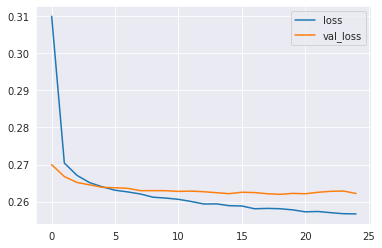

In [615]:
losses[['loss','val_loss']].plot()

So the loss for both decreases with the number of epochs, but after just 2 epochs there isn't really much change in validation loss. Could add early stop to model to speed up process.

Creating predictions and evaluating the model performance using confusion matrix and classification report.

In [616]:
from sklearn.metrics import classification_report,confusion_matrix

In [617]:
predictions = model.predict_classes(X_test)

In [618]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.47      0.62     23945
           1       0.88      0.99      0.93     94200

    accuracy                           0.89    118145
   macro avg       0.91      0.73      0.78    118145
weighted avg       0.89      0.89      0.87    118145



In [619]:
confusion_matrix(y_test,predictions)

array([[11179, 12766],
       [  718, 93482]])

The model achieved around 90% accuracy, however the dataframe was not very well balanced (much more fully paid off loans than charged off). This means if we had a model that only predicted 'fully paid' then we would still get a fairly good accuracy. 

In [620]:
#Find accuracy if all predicts fully paid
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off    77673 
Name: loan_status, dtype: int64

In [621]:
318357/len(df)*100

80.38709188697825

So if the model only predicted fully paid we would get 80% accuracy.

To get a better sense of model performance we need to look at precision, recall and f1-score for each of the cases, in particular the lower represented class (charged off). Having a model with a good ability to predict charged off cases is also more important because these cases cause the lending club to lose money. 

So for case 0 (charged off) we have good precision at 0.91, poor recall at 0.46 and a mediocre f1-score of 0.62. 